In [2]:
import pandas as pd # Import pandas for data manipulation and analysis
import numpy as np # Import numpy for numerical operations and generating random data
import matplotlib.pyplot as plt # Import matplotlib for basic plotting and visualization
import seaborn as sns # Import seaborn for statistical data visualization and enhanced plotting
import plotly.express as px # Import plotly.express for creating interactive plots and dashboards
from mpl_toolkits.mplot3d import axes3d # Import 3D plotting utilities from matplotlib
import plotly.graph_objects as go # Import plotly.graph_objects for creating complex interactive plots and visualizations
from matplotlib_venn import venn2 # Import matplotlib_venn for creating Venn diagrams
from wordcloud import WordCloud # Import wordcloud for generating word clouds from text data

In [7]:
import pandas as pd
from google.colab import files
uploaded = files.upload()


Saving EV.csv to EV.csv


In [8]:
import io
df = pd.read_csv(io.BytesIO(uploaded['EV.csv']))

In [9]:
df.head()

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV stock share,Cars,EV,2011,percent,0.00039
1,Australia,Historical,EV sales share,Cars,EV,2011,percent,0.00650
2,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.00000
3,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,49.00000
4,Australia,Historical,EV stock,Cars,BEV,2012,Vehicles,220.00000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12654 entries, 0 to 12653
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   region      12654 non-null  object 
 1   category    12654 non-null  object 
 2   parameter   12654 non-null  object 
 3   mode        12654 non-null  object 
 4   powertrain  12654 non-null  object 
 5   year        12654 non-null  int64  
 6   unit        12654 non-null  object 
 7   value       12654 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 791.0+ KB


In [11]:
df.shape

(12654, 8)

In [12]:
df.columns.to_list()

['region',
 'category',
 'parameter',
 'mode',
 'powertrain',
 'year',
 'unit',
 'value']

In [13]:
df.isnull().sum()

,0
region,0
category,0
parameter,0
mode,0
powertrain,0
year,0
unit,0
value,0


In [14]:
df.groupby('year')['year'].value_counts().head(5)

,count
year,
2010,303
2011,390
2012,442
2013,481
2014,515


In [16]:
Year_wise_sales=df.groupby('year').size()
Year_wise_sales=Year_wise_sales.reset_index(name='sales')

In [17]:
Year_wise_sales.head(5)

,year,sales
0,2010,303
1,2011,390
2,2012,442
3,2013,481
4,2014,515


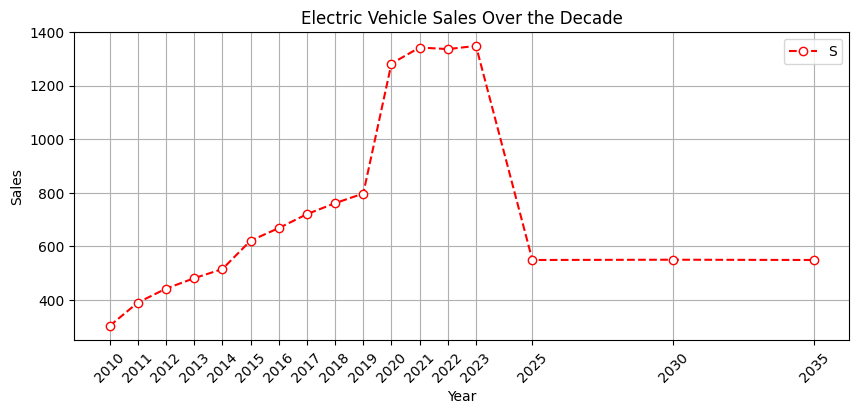

In [18]:
plt.figure(figsize=(10,4))
plt.plot(Year_wise_sales['year'], Year_wise_sales['sales'], color='red', marker='o', markerfacecolor='white', linestyle='--')
plt.xticks(Year_wise_sales['year'], rotation=45)
plt.legend('Sales')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.grid(True)
plt.title('Electric Vehicle Sales Over the Decade')
plt.show()

In [19]:
Mode=df.groupby('mode')['value'].sum().sort_values(ascending=False).reset_index()
Mode

,mode,value
0,Cars,4.708184e+09
1,Vans,2.814544e+08
2,EV,2.521943e+08
3,Trucks,9.869065e+07
4,Buses,6.746955e+07


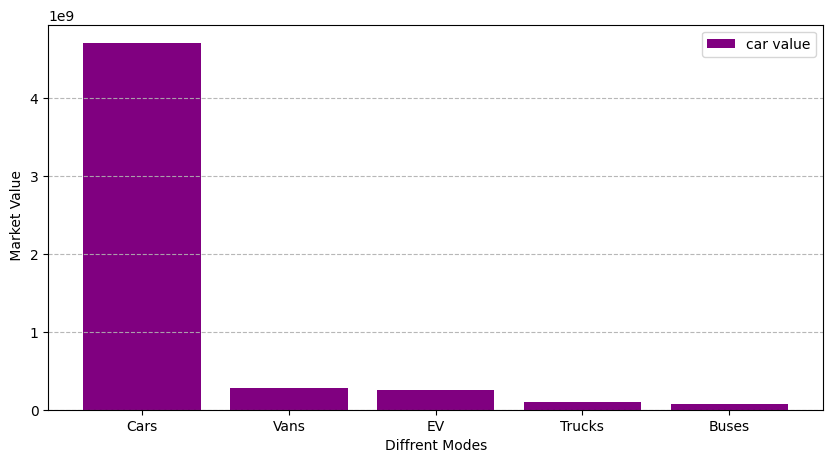

In [20]:
plt.figure(figsize=(10,5))
plt.bar(Mode['mode'],Mode['value'],color='purple',label='car value')
plt.xlabel('Diffrent Modes')
plt.ylabel(' Market Value')
plt.grid(axis='y', linestyle='--',alpha=0.9)
plt.legend()
plt.show()

In [21]:
parameter_to_plot = 'EV sales'
df_filtered = df[df['parameter'] == 'EV sales']
pivot_table = df_filtered.pivot_table(index='mode', columns='year', values='value', aggfunc='sum', fill_value=0)
x=pivot_table.columns.values
y=pivot_table.index.values
X, Y = np.meshgrid(x, y)
Z = pivot_table.values
fig = go.Figure(data=[go.Mesh3d(
x=X.flatten(),
y=Y.flatten(),
z=Z.flatten(),
opacity=0.7,
color='blue',
intensity=Z.flatten()
)])
fig.show()

In [22]:
Distribution=df['value'].describe().reset_index()

In [23]:
df

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV stock share,Cars,EV,2011,percent,3.900000e-04
1,Australia,Historical,EV sales share,Cars,EV,2011,percent,6.500000e-03
2,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,4.900000e+01
3,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,4.900000e+01
4,Australia,Historical,EV stock,Cars,BEV,2012,Vehicles,2.200000e+02
...,...,...,...,...,...,...,...,...
12649,World,Projection-STEPS,EV sales share,Cars,EV,2035,percent,5.500000e+01
12650,World,Projection-STEPS,EV stock share,Cars,EV,2035,percent,3.100000e+01
12651,World,Projection-APS,EV charging points,EV,Publicly available fast,2035,charging points,9.400000e+06
12652,World,Projection-APS,EV charging points,EV,Publicly available slow,2035,charging points,1.500000e+07


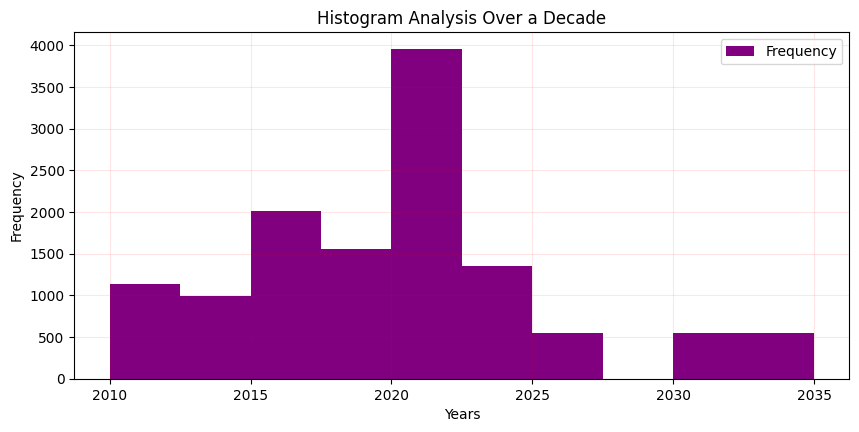

In [24]:
plt.figure(figsize=(10,4.5))
plt.hist(df['year'],bins=10,color='purple',orientation="vertical",label='Frequency')
plt.xlabel('Years')
plt.ylabel('Frequency')
plt.title('Histogram Analysis Over a Decade')
plt.grid(alpha=0.1,color='red')
plt.legend()
plt.show()

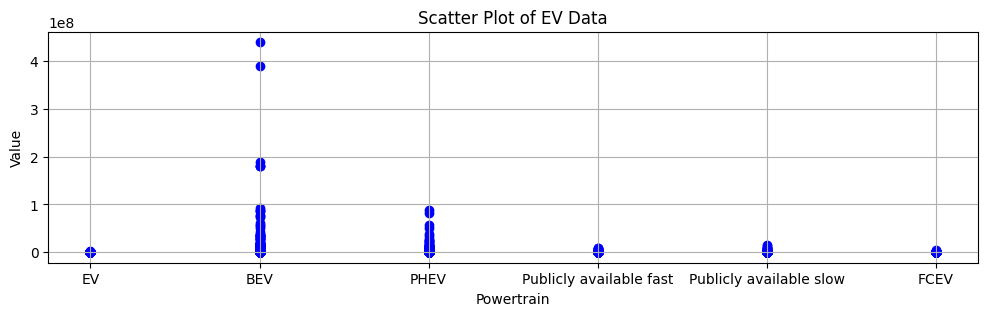

In [25]:
plt.figure(figsize=(12,3))
plt.scatter(df['powertrain'],df['value'],color='blue')
plt.xlabel('Powertrain')
plt.ylabel('Value')
plt.title('Scatter Plot of EV Data')
plt.grid(True)
plt.show()

In [26]:
fig=px.scatter_3d(data_frame=df,x='value',y='mode',z='powertrain',color='mode')
fig.show()

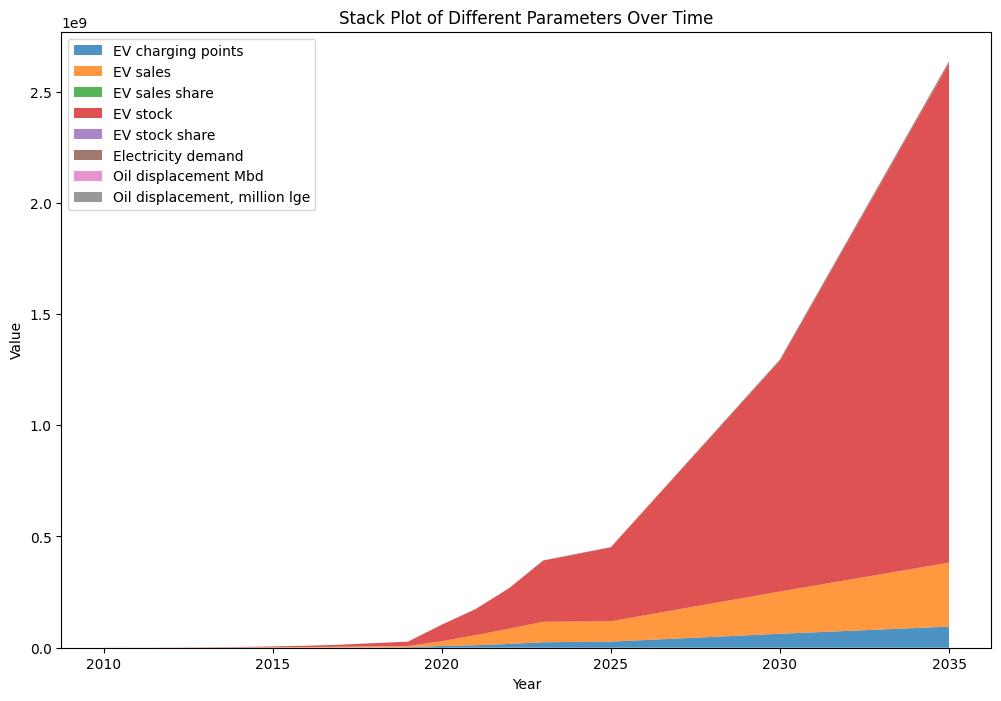

In [27]:
pivot_df = df.pivot_table(index='year',columns='parameter',values='value',aggfunc='sum',fill_value=0)
plt.figure(figsize=(12, 8))
plt.stackplot(pivot_df.index, pivot_df.T, labels=pivot_df.columns, alpha=0.8)
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Stack Plot of Different Parameters Over Time')
plt.legend(loc='upper left')
plt.show()

In [28]:
a=df.groupby('mode')['mode'].size().reset_index(name='count')

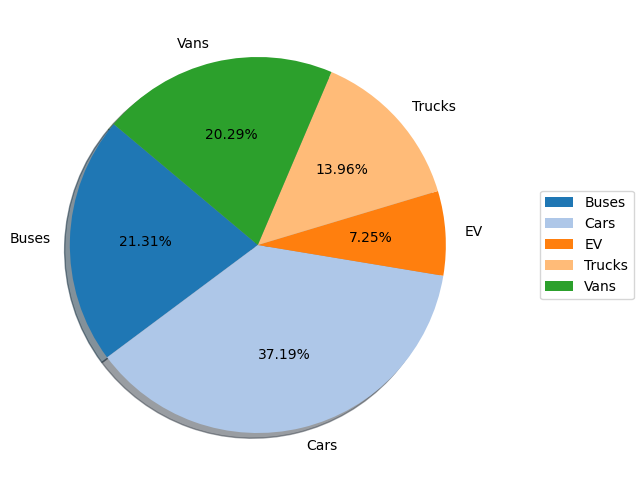

In [30]:
plt.figure(figsize=(10,5))
plt.pie(a['count'],labels=a['mode'],autopct="%1.2f%%",startangle=140,shadow=True,colors=plt.get_cmap('tab20').colors)
plt.legend(loc='center', bbox_to_anchor=(1.2, 0.5))
plt.tight_layout()
plt.show()

In [31]:
# Sub-plots: Combine multiple plots into a single figure.

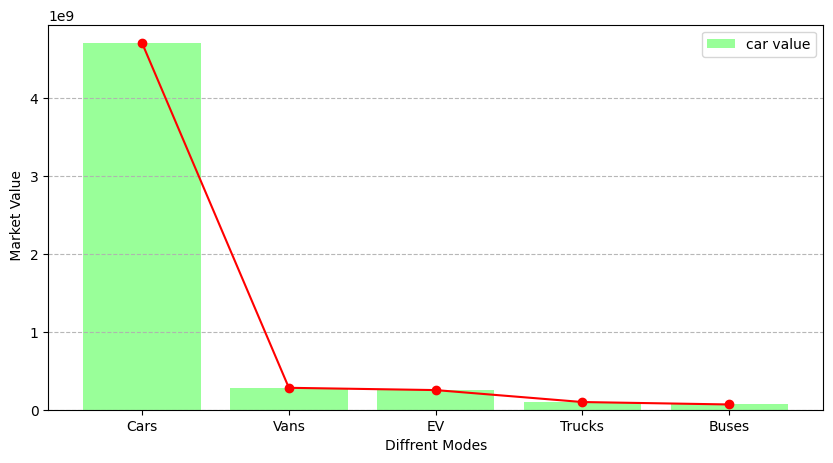

In [32]:
plt.figure(figsize=(10,5))
plt.bar(Mode['mode'],Mode['value'],color='#99ff99',label='car value')
plt.plot(Mode['mode'],Mode['value'],color='red',marker='o')
plt.legend('Trend line')
plt.xlabel('Diffrent Modes')
plt.ylabel(' Market Value')
plt.grid(axis='y', linestyle='--',alpha=0.9)
plt.legend()
plt.show()

In [33]:
df

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV stock share,Cars,EV,2011,percent,3.900000e-04
1,Australia,Historical,EV sales share,Cars,EV,2011,percent,6.500000e-03
2,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,4.900000e+01
3,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,4.900000e+01
4,Australia,Historical,EV stock,Cars,BEV,2012,Vehicles,2.200000e+02
...,...,...,...,...,...,...,...,...
12649,World,Projection-STEPS,EV sales share,Cars,EV,2035,percent,5.500000e+01
12650,World,Projection-STEPS,EV stock share,Cars,EV,2035,percent,3.100000e+01
12651,World,Projection-APS,EV charging points,EV,Publicly available fast,2035,charging points,9.400000e+06
12652,World,Projection-APS,EV charging points,EV,Publicly available slow,2035,charging points,1.500000e+07


In [34]:
pivot_df = df.pivot_table(index='year',columns='parameter',values='value',aggfunc='mean',fill_value=0)
corre=pivot_df.corr()
corre

parameter,EV charging points,EV sales,EV sales share,EV stock,EV stock share,Electricity demand,Oil displacement Mbd,"Oil displacement, million lge"
parameter,,,,,,,,
EV charging points,1.000000,0.997882,0.974305,0.981818,0.979107,0.975609,0.983580,0.983810
EV sales,0.997882,1.000000,0.984449,0.977968,0.980148,0.971782,0.981620,0.981920
EV sales share,0.974305,0.984449,1.000000,0.964768,0.980472,0.963203,0.973374,0.973757
EV stock,0.981818,0.977968,0.964768,1.000000,0.996422,0.999159,0.999145,0.999063
EV stock share,0.979107,0.980148,0.980472,0.996422,1.000000,0.996756,0.998492,0.998504
Electricity demand,0.975609,0.971782,0.963203,0.999159,0.996756,1.000000,0.998760,0.998660
Oil displacement Mbd,0.983580,0.981620,0.973374,0.999145,0.998492,0.998760,1.000000,0.999997
"Oil displacement, million lge",0.983810,0.981920,0.973757,0.999063,0.998504,0.998660,0.999997,1.000000


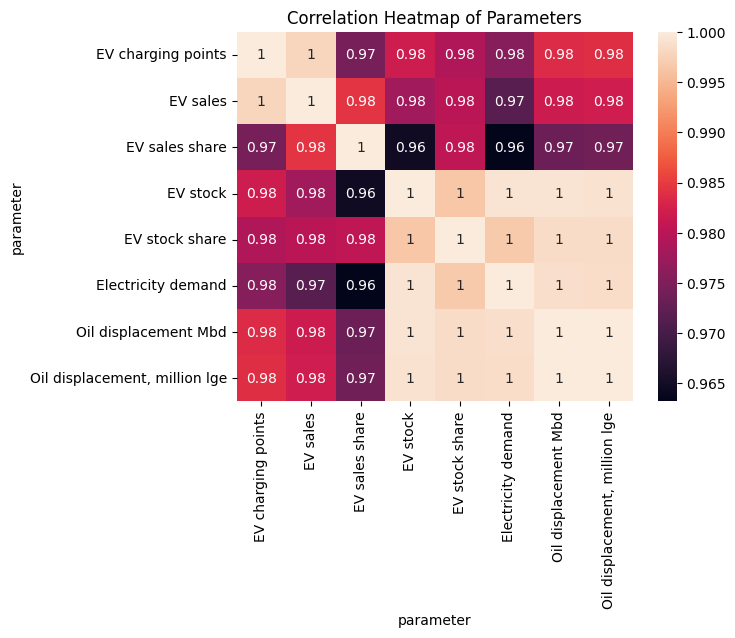

In [35]:
corr_matrix = pivot_df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Heatmap of Parameters')
plt.show()

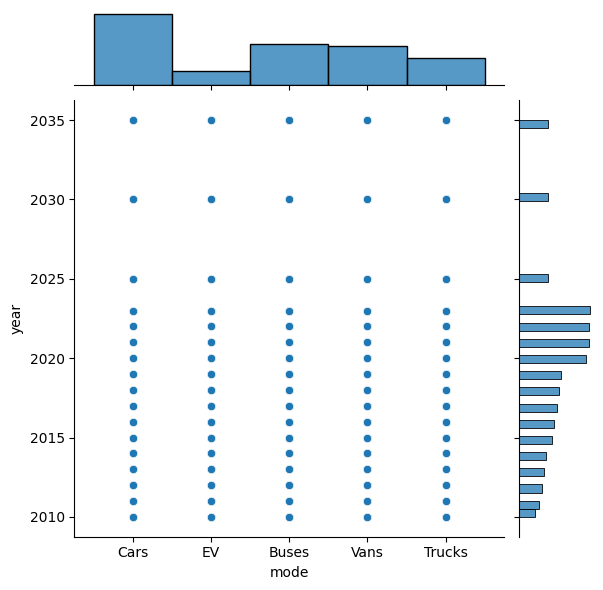

In [37]:
sns.jointplot(data=df, x="mode", y="year")
plt.show()

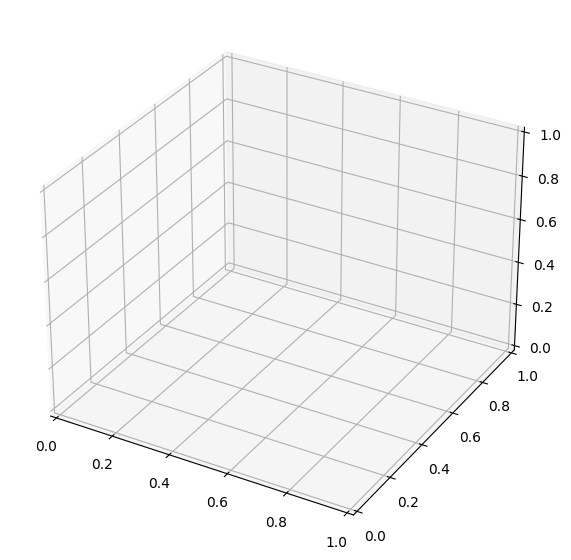

In [38]:
fig=plt.figure(figsize=(10, 7))
ax=fig.add_subplot(111, projection='3d')

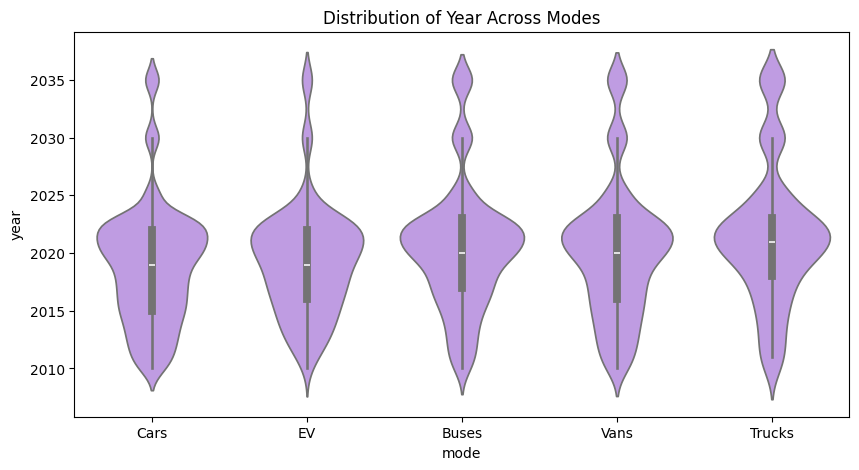

In [40]:
plt.figure(figsize=(10,5))
sns.violinplot(x=df['mode'],y=df['year'],color='#bf90ee')
plt.title('Distribution of Year Across Modes')
plt.show()

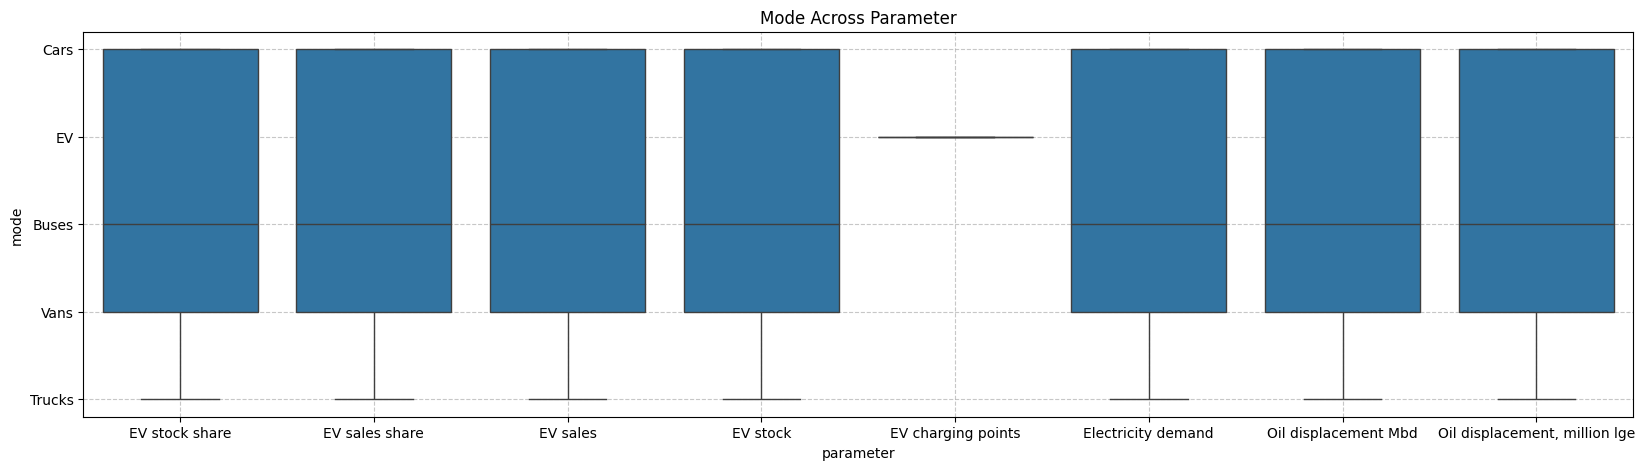

In [41]:
plt.figure(figsize=(20,5))
sns.boxplot(x=df['parameter'],y=df['mode'])
plt.title('Mode Across Parameter')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [42]:
Region_sales=df.groupby('powertrain')['powertrain'].size().rename('Count').reset_index()
Region_sales

,powertrain,Count
0,BEV,3204
1,EV,4894
2,FCEV,1512
3,PHEV,2126
4,Publicly available fast,455
5,Publicly available slow,463


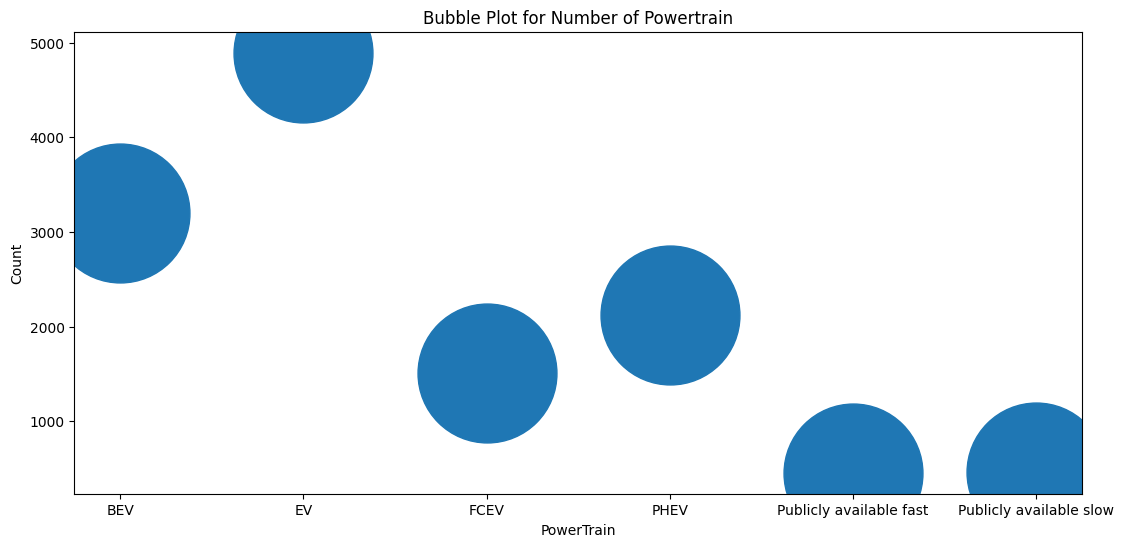

In [43]:
plt.figure(figsize=(13, 6))
plt.scatter(x=Region_sales['powertrain'], y=Region_sales['Count'],s=10000)
plt.title('Bubble Plot for Number of Powertrain')
plt.xlabel('PowerTrain')
plt.ylabel('Count')
plt.show()

In [44]:
fig=px.treemap(data_frame=df,path=['mode'],values='value')
fig.update_traces(textinfo='label+percent entry', hovertemplate='Label:%{label}<br>Value: %{value}<br>Percent: %{percentEntry}')
fig.update_layout(font=dict(size=20, family='Arial'))
fig.update_traces(marker=dict(line=dict(width=1, color='Black')))
fig.update_layout(title_text='Treemap of Modes by Value',title_x=0.5,title_xanchor='center')
fig.update_layout(margin=dict(t=50,l=0,r=0,b=0))

In [45]:
pip install venn

  Preparing metadata (setup.py) ... done
  Created wheel for venn: filename=venn-0.1.3-py3-none-any.whl size=19702 sha256=8d3013286169b25d8ff202b678f489fe2b3a09efc35dad74d852aa1a00284f7e
  Stored in directory: /root/.cache/pip/wheels/9c/ce/43/705b4a04cd822891d1d7a4c43fc444b4798978e72c79528c5f
Successfully built venn


In [46]:
filt_cars=df['mode']=='Cars'
filt_EV_stock=df['parameter']=='EV stock'
filt_powertrain=df['powertrain']=='PHEV'
filtered_df=df[filt_cars & filt_EV_stock & filt_powertrain]
filtered_df

,region,category,parameter,mode,powertrain,year,unit,value
8,Australia,Historical,EV stock,Cars,PHEV,2012,Vehicles,80.0
11,Australia,Historical,EV stock,Cars,PHEV,2013,Vehicles,180.0
20,Australia,Historical,EV stock,Cars,PHEV,2014,Vehicles,1100.0
23,Australia,Historical,EV stock,Cars,PHEV,2015,Vehicles,2100.0
32,Australia,Historical,EV stock,Cars,PHEV,2016,Vehicles,2800.0
...,...,...,...,...,...,...,...,...
12451,World,Projection-STEPS,EV stock,Cars,PHEV,2025,Vehicles,23000000.0
12511,World,Projection-STEPS,EV stock,Cars,PHEV,2030,Vehicles,56000000.0
12535,World,Projection-APS,EV stock,Cars,PHEV,2030,Vehicles,51000000.0
12611,World,Projection-APS,EV stock,Cars,PHEV,2035,Vehicles,82000000.0


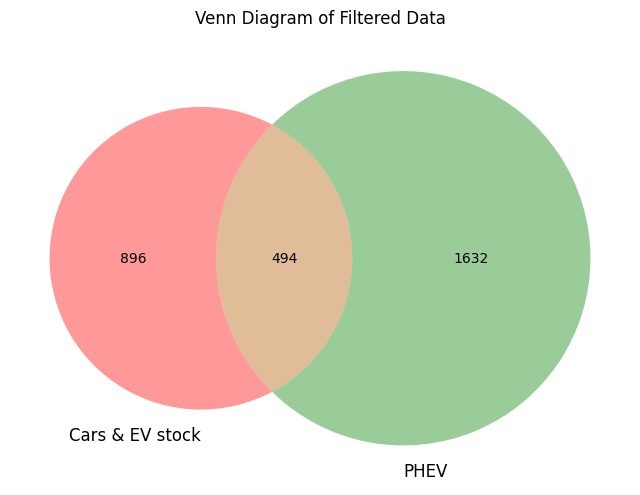

In [47]:
filt_cars=df['mode']=='Cars'
filt_EV_stock=df['parameter']=='EV stock'
filt_powertrain=df['powertrain']=='PHEV'
filtered_IEA=df[filt_cars & filt_EV_stock & filt_powertrain]
set1=set(df[filt_cars & filt_EV_stock].index)
set2=set(df[filt_powertrain].index)
plt.figure(figsize=(8, 6))
venn2([set1, set2], ('Cars & EV stock', 'PHEV'))
plt.title('Venn Diagram of Filtered Data')
plt.show()

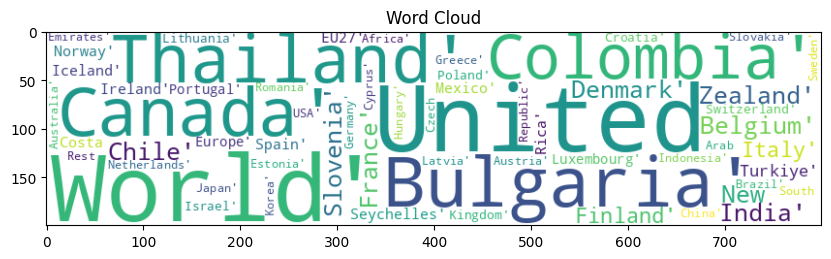

In [48]:
word=df['region'].unique()
text=str(set(word))
wordcloud = WordCloud(width=800, height=200, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('ON')
plt.title('Word Cloud')
plt.show()